# HIPPO for 2A Protease (5/?)

## Imports

In [51]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
%autoreload 2
from pathlib import Path
import molparse as mp
import hippo2 as hippo
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from pprint import pprint
import json
import mout
import pickle

## Load the project

In [53]:
# animal = hippo.HIPPO.from_pickle('pickles/2A_hippo_fingerprinted_trim.pickle')
# animal = hippo.HIPPO.from_pickle('pickles/2A_hippo_random_latest.pickle')
animal = hippo.HIPPO.from_pickle('pickles/2A_hippo_requoted_fragnet.pickle')

path = pickles/2A_hippo_requoted_fragnet.pickle 


In [54]:
animal.summary()

HIPPO(hippo2_test)                              
target_name = A71EV2A             
max_lead_time = 10 workdays       
max_bb_price = 300 $              
min_bb_quantity = 20 mg           
#compound_sets = 3                
#compounds = 12241                
#poses = 44972                    
#tags = 4                         
                                                        
compound sets:                                      
CompoundSet("hits", #compounds=38, #poses=49)           
CompoundSet("bases", #compounds=17, #poses=0)           
CompoundSet("elabs", #compounds=12224, #poses=44972)    
                                                        
tags:                                               
Syndirella #compounds=12240, #poses=44972               
base #compounds=16, #poses=0                            
too_contorted #compounds=2, #poses=0                    
elab #compounds=12223, #poses=44972                     


writing graphs/elabs_routes_fragnet.html ... Done.
writing graphs/elabs_routes_fragnet.png ... Done.


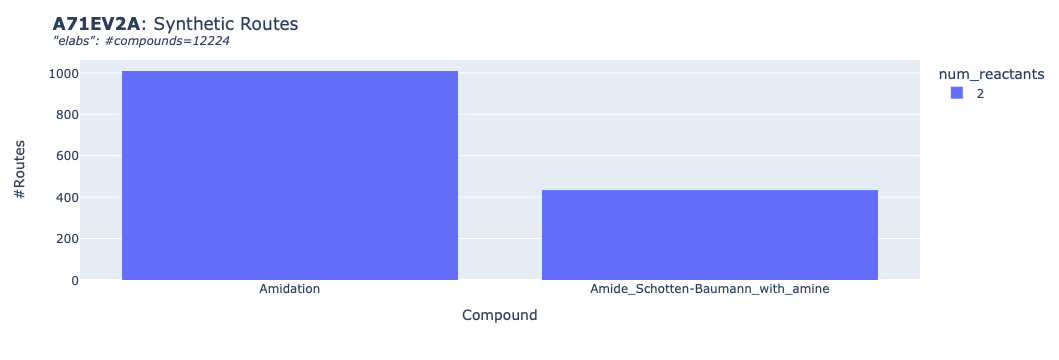

In [55]:
animal.plot_synthetic_routes(html='graphs/elabs_routes_fragnet', png='graphs/elabs_routes_fragnet')

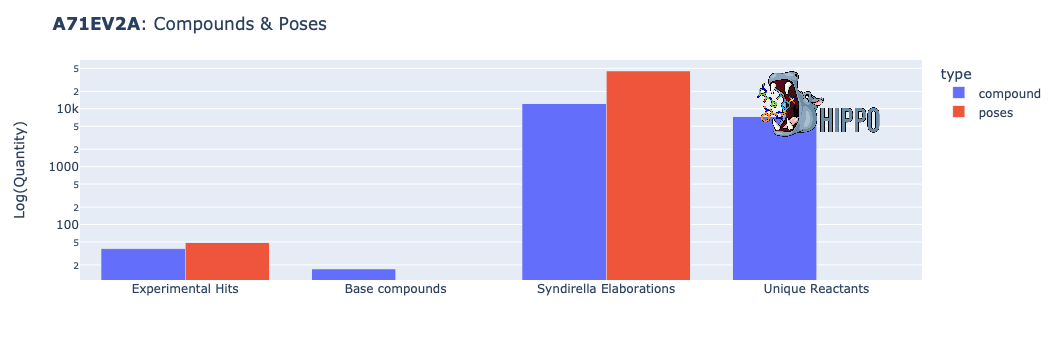

In [56]:
animal.plot_numbers()

writing graphs/reactant_prices_fragnet.html ... Done.
writing graphs/reactant_prices_fragnet.pdf ... Done.


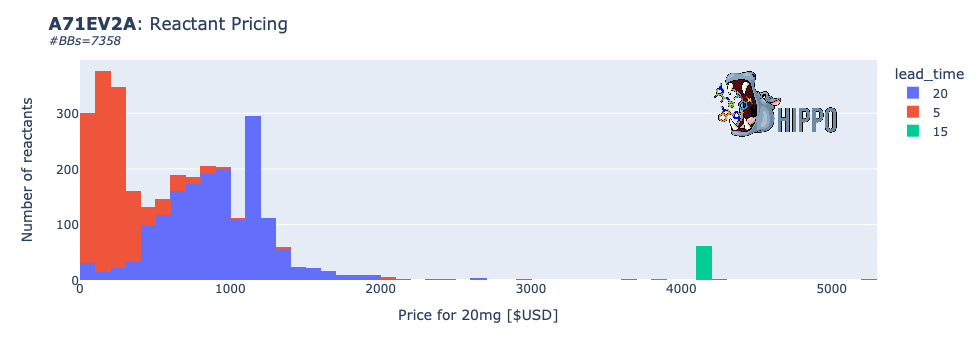

In [85]:
animal.plot_reactant_price(pdf='graphs/reactant_prices_fragnet', html='graphs/reactant_prices_fragnet')

0
writing graphs/reactant_sankey_fragnet.html ... Done.
writing graphs/reactant_sankey_fragnet.pdf ... Done.


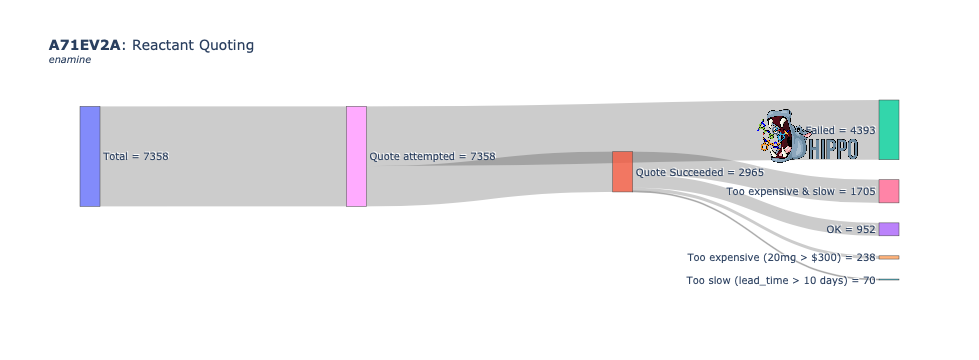

In [86]:
animal.plot_reactant_sankey(pdf='graphs/reactant_sankey_fragnet', html='graphs/reactant_sankey_fragnet')

In [82]:
from IPython.display import display

def inspiration_mcs(comp):

    comp_smiles = comp.smiles

    # drawings = []

    for inspiration in comp.inspirations:
        insp_smiles = mp.rdkit.mol_to_smiles(inspiration.mol)
        print(insp_smiles)

        display(mp.rdkit.draw_mcs({comp_smiles:comp.name, insp_smiles:inspiration.compound.name}, align_substructure=False))

    # return drawings

CN1CC(N)C(C(O)NC2CCC2)N1


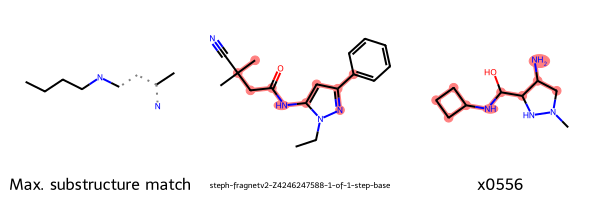

CC1NN(C)C(C)C1NC(O)CCN


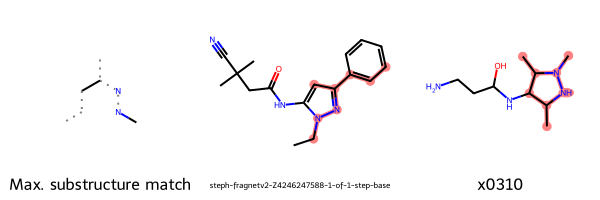

In [84]:
inspiration_mcs(animal.bases[1])

## Random BBS Generation

In [42]:
animal._bbs_id_counter = 0

In [43]:
for bb in animal.building_blocks:
    if bb.price_picker:
        assert bb.price_picker.min_price > 0

In [44]:
animal._min_bb_quantity = 10

In [45]:
# animal.building_blocks['EN300-54150']

In [46]:
output_directory = Path('bbs_fragnet_3k')

In [47]:
# test
mout.debug(animal.bbs_id_counter)
bbs, _ = animal.random_sample(3000, max_iter=5000, debug=False, increment_count=False)
bbs.write(output_directory, overwrite=True)

In [ ]:
for i in range(500):
    mout.debug(animal.bbs_id_counter)
    bbs, _ = animal.random_sample(8000, max_iter=5000, debug=False, increment_count=True)
    bbs.write(output_directory, overwrite=True)

In [ ]:
animal.write_pickle('pickles/2A_hippo_fragnet_random_latest.pickle')

In [ ]:
mout.success('DONE')

# Stuff that must go into JSON output:

- [x] inspirations
- [x] base
- [ ] lead_time?
- [ ] reaction info